In [1]:
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.feature_selection import RFE, SequentialFeatureSelector, SelectKBest, mutual_info_classif, f_classif
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from scipy.stats import moment
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
%matplotlib inline

# Comparison of feature selection methods and how each can improve the classifier's accuracy.
# Use aggregated colour features as input and apply feature selection methods (Filter, Wrapper)
# For Filter, use ANOVA F-Value (f_classif) and Mutual Information
# For Wrapper, use Forward Selection, Backward Selection and Recursive Feature Elimination.
# Use SGD classifier

In [2]:
def loadImg(arr):
    a = []
    for path in arr:
        img = cv.imread(path)
        img = cv.resize(img, (64, 64))
        img = cv.GaussianBlur(img, (3, 3), sigmaX= 3.0)

        a.append(img)
    
    return a

def getData(arr):
    a = []
    for i in range(len(arr)):
        grey = cv.cvtColor(arr[i], cv.COLOR_BGR2GRAY)
        colour_moment1 = moment(arr[i].reshape(-1, 3), axis= 0, order= 1).ravel()
        colour_moment2 = moment(arr[i].reshape(-1, 3), axis= 0, order= 2).ravel()
        colour_moment3 = moment(arr[i].reshape(-1, 3), axis= 0, order= 3).ravel()

        colour_max = np.max(arr[i].reshape(-1, 3), axis= 0).ravel()
        colour_min = np.min(arr[i].reshape(-1, 3), axis= 0).ravel()


        grey_moment1 = moment(grey.ravel(), order= 1).ravel()
        grey_moment2 = moment(grey.ravel(), order= 2).ravel()
        grey_moment3 = moment(grey.ravel(), order= 3).ravel()


        grey_max = [np.max(grey.ravel())]
        grey_min = [np.min(grey.ravel())]

        a.append(np.concat((colour_moment1, colour_moment2, colour_moment3,\
                             colour_max, colour_min,\
                            grey_moment1, grey_moment2, grey_moment3,\
                            grey_max, grey_min,\
                            )))
        
    return a


def ShowReport(truth, pred, classes, title):
    accuracy = accuracy_score(truth, pred)
    print(f"{title} Accuracy: {accuracy*100:.2f}%")
    print(classification_report(truth, pred))

    # Plotting the confusion matrix
    cm = confusion_matrix(truth, pred)
    cmdp = ConfusionMatrixDisplay(cm, display_labels= classes)
    _, ax = plt.subplots(figsize=(8, 8))
    cmdp.plot(cmap=plt.cm.Blues, xticks_rotation=45, ax=ax)
    plt.title(title)
    plt.tight_layout()
    plt.show()


In [3]:
all_categories = [
            'Agriculture', 'Airport', 'Beach', 'City', 'Desert',
            'Forest', 'Grassland', 'Highway', 'Lake', 'Mountain',
            'Parking', 'Port', 'Railway', 'Residential', 'River'
]

data = []
data_class = []
for cat in all_categories:
    for i in range(800):
        data.append(os.path.join('data', cat, "{0:03}".format(i + 1) + ".jpg"))
        data_class.append(cat)

<BarContainer object of 15 artists>

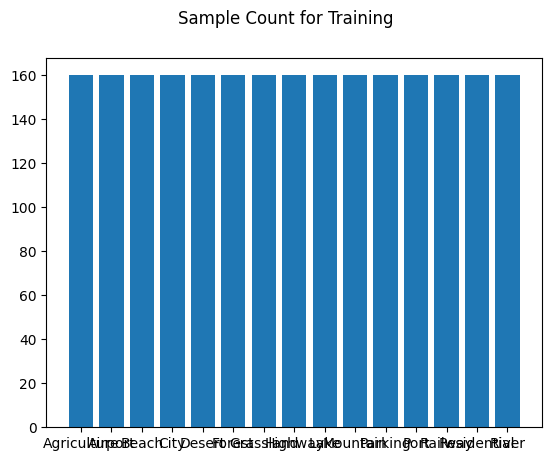

In [4]:
train_x, test_x, train_y, test_y = train_test_split(data, data_class, train_size= 0.8, stratify= data_class)

unique, count = np.unique(test_y, return_counts= True)

fig, ax = plt.subplots()
fig.suptitle('Sample Count for Training')
ax.bar(unique, count)

In [5]:
# Load images for training
train_img_x = loadImg(train_x)
test_img_x = loadImg(test_x)

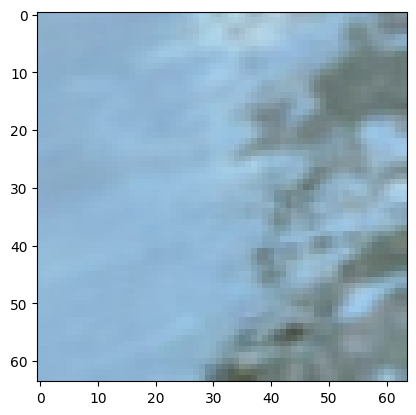

In [6]:
plt.imshow(train_img_x[1])

In [7]:
train_data_x = getData(train_img_x)

In [8]:
test_data_x = getData(test_img_x)

In [9]:
sgd_raw = SGDClassifier()
sgd_raw.fit(train_data_x, train_y)

SGDClassifier()

In [10]:
sgd_raw_pred = sgd_raw.predict(test_data_x)

raw SGD Accuracy: 15.75%
              precision    recall  f1-score   support

 Agriculture       0.16      0.04      0.07       160
     Airport       0.13      0.19      0.15       160
       Beach       0.13      0.23      0.16       160
        City       0.03      0.01      0.01       160
      Desert       0.46      0.51      0.48       160
      Forest       0.00      0.00      0.00       160
   Grassland       0.00      0.00      0.00       160
     Highway       0.27      0.08      0.12       160
        Lake       0.40      0.14      0.20       160
    Mountain       0.04      0.01      0.01       160
     Parking       0.15      0.09      0.11       160
        Port       0.13      0.95      0.23       160
     Railway       0.15      0.03      0.05       160
 Residential       0.05      0.01      0.02       160
       River       0.09      0.08      0.08       160

    accuracy                           0.16      2400
   macro avg       0.14      0.16      0.11      2400
w

/home/anger324/miniconda3/envs/9517_ass/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/anger324/miniconda3/envs/9517_ass/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/anger324/miniconda3/envs/9517_ass/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

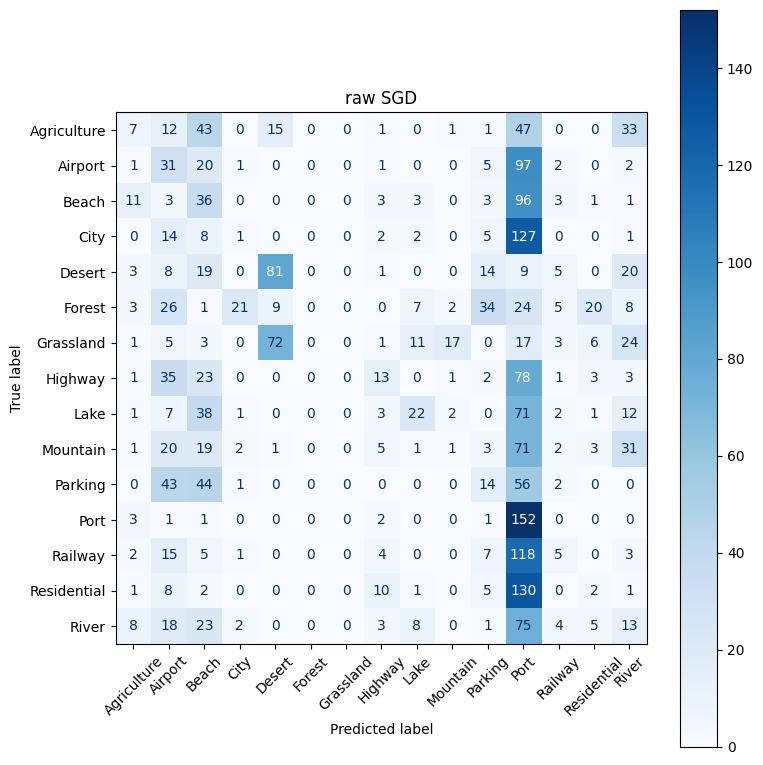

In [11]:
ShowReport(test_y, sgd_raw_pred, all_categories, "raw SGD")

In [12]:
rfe = RFE(SGDClassifier())
rfe.fit(train_data_x, train_y)


RFE(estimator=SGDClassifier())

Recursive Feature Elimination Accuracy: 19.00%
              precision    recall  f1-score   support

 Agriculture       0.26      0.07      0.11       160
     Airport       0.14      0.17      0.15       160
       Beach       0.30      0.02      0.04       160
        City       0.00      0.00      0.00       160
      Desert       0.87      0.78      0.82       160
      Forest       0.78      0.46      0.58       160
   Grassland       0.70      0.26      0.38       160
     Highway       0.00      0.00      0.00       160
        Lake       0.32      0.04      0.08       160
    Mountain       0.07      0.01      0.02       160
     Parking       0.00      0.00      0.00       160
        Port       0.09      0.99      0.17       160
     Railway       0.00      0.00      0.00       160
 Residential       0.14      0.01      0.01       160
       River       0.10      0.03      0.05       160

    accuracy                           0.19      2400
   macro avg       0.25      0.19

/home/anger324/miniconda3/envs/9517_ass/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/anger324/miniconda3/envs/9517_ass/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/anger324/miniconda3/envs/9517_ass/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

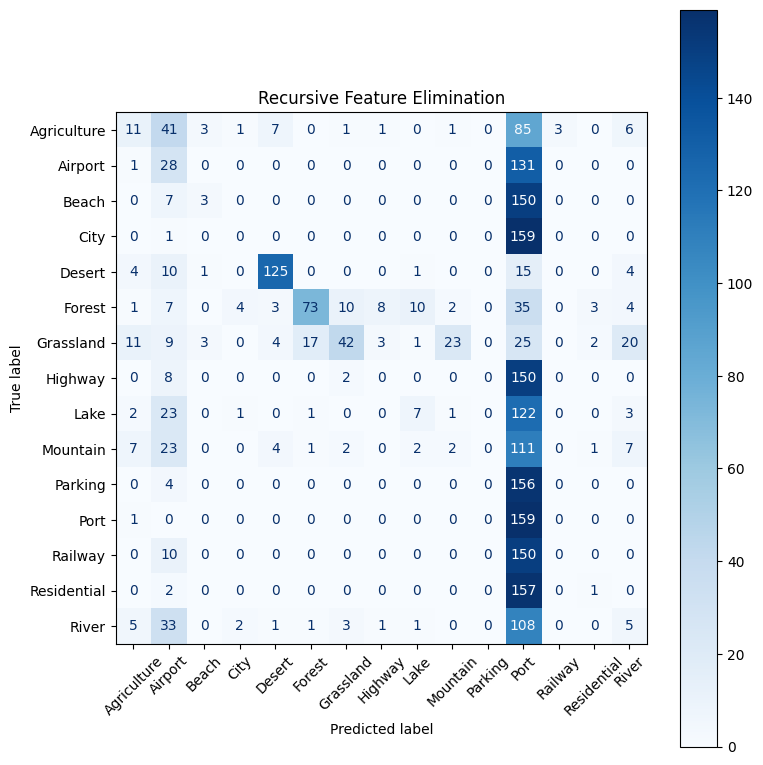

In [13]:
rfe_res = rfe.predict(test_data_x)
ShowReport(test_y, rfe_res, all_categories, "Recursive Feature Elimination")

In [14]:
fwd_sgd = SGDClassifier()
fwd_selector = SequentialFeatureSelector(fwd_sgd, direction= 'forward')
train = fwd_selector.fit_transform(train_data_x, train_y)
test = fwd_selector.transform(test_data_x)

fwd_sgd.fit(train, train_y)
fwd_pred = fwd_sgd.predict(test)

Forward Selector Accuracy: 26.71%
              precision    recall  f1-score   support

 Agriculture       0.00      0.00      0.00       160
     Airport       0.31      0.28      0.29       160
       Beach       0.40      0.49      0.44       160
        City       0.29      0.19      0.23       160
      Desert       0.84      0.82      0.83       160
      Forest       0.92      0.07      0.13       160
   Grassland       0.15      0.65      0.25       160
     Highway       0.11      0.10      0.10       160
        Lake       0.24      0.21      0.23       160
    Mountain       0.14      0.02      0.03       160
     Parking       0.26      0.41      0.32       160
        Port       0.20      0.61      0.30       160
     Railway       0.47      0.09      0.16       160
 Residential       0.00      0.00      0.00       160
       River       0.36      0.05      0.09       160

    accuracy                           0.27      2400
   macro avg       0.31      0.27      0.23   

/home/anger324/miniconda3/envs/9517_ass/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/anger324/miniconda3/envs/9517_ass/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/anger324/miniconda3/envs/9517_ass/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

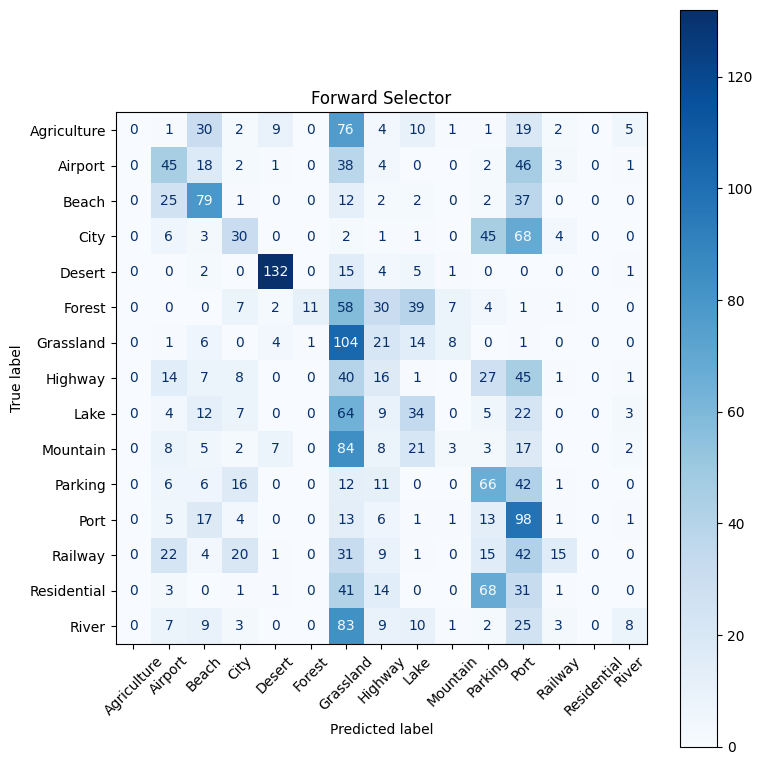

In [15]:
ShowReport(test_y, fwd_pred, all_categories, "Forward Selector")

In [16]:
bck_sgd = SGDClassifier()
bck_selector = SequentialFeatureSelector(bck_sgd, direction= 'backward')
train = bck_selector.fit_transform(train_data_x, train_y)
test = bck_selector.transform(test_data_x)

bck_sgd.fit(train, train_y)
bck_pred = bck_sgd.predict(test)

Backward Selector Accuracy: 24.08%
              precision    recall  f1-score   support

 Agriculture       0.12      0.01      0.02       160
     Airport       0.00      0.00      0.00       160
       Beach       0.58      0.46      0.51       160
        City       0.29      0.23      0.26       160
      Desert       0.62      0.87      0.72       160
      Forest       0.94      0.10      0.18       160
   Grassland       0.54      0.36      0.43       160
     Highway       0.00      0.00      0.00       160
        Lake       0.55      0.13      0.21       160
    Mountain       0.12      0.72      0.21       160
     Parking       0.00      0.00      0.00       160
        Port       0.00      0.00      0.00       160
     Railway       0.15      0.69      0.25       160
 Residential       0.24      0.03      0.06       160
       River       0.03      0.01      0.02       160

    accuracy                           0.24      2400
   macro avg       0.28      0.24      0.19  

/home/anger324/miniconda3/envs/9517_ass/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/anger324/miniconda3/envs/9517_ass/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/anger324/miniconda3/envs/9517_ass/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

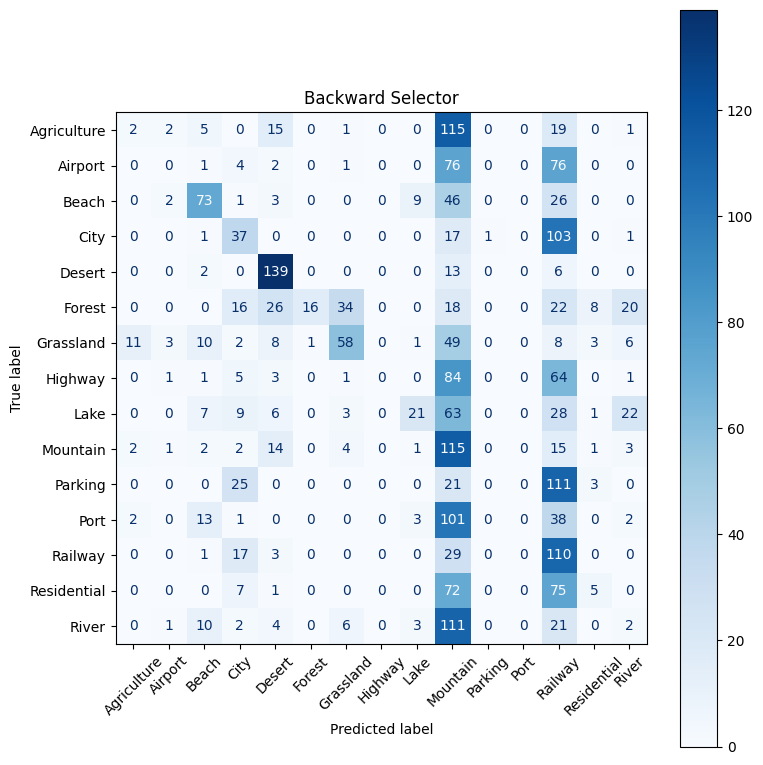

In [17]:
ShowReport(test_y, bck_pred, all_categories, "Backward Selector")

In [18]:
mutuf = SelectKBest(score_func= mutual_info_classif)
mutuf_train_x = mutuf.fit_transform(train_data_x, train_y)
mutuf_test_x = mutuf.transform(test_data_x)

mutuf_sgd = SGDClassifier()
mutuf_sgd.fit(mutuf_train_x, train_y)
mutuf_pred = mutuf_sgd.predict(mutuf_test_x)

Mutual Information Filter Accuracy: 14.83%
              precision    recall  f1-score   support

 Agriculture       0.25      0.02      0.03       160
     Airport       0.11      0.09      0.10       160
       Beach       0.20      0.61      0.30       160
        City       0.13      0.07      0.09       160
      Desert       0.51      0.47      0.49       160
      Forest       0.47      0.11      0.18       160
   Grassland       0.50      0.01      0.01       160
     Highway       0.14      0.22      0.17       160
        Lake       0.19      0.19      0.19       160
    Mountain       0.05      0.01      0.01       160
     Parking       0.07      0.32      0.11       160
        Port       0.09      0.01      0.02       160
     Railway       0.00      0.00      0.00       160
 Residential       0.00      0.00      0.00       160
       River       0.07      0.09      0.08       160

    accuracy                           0.15      2400
   macro avg       0.18      0.15    

/home/anger324/miniconda3/envs/9517_ass/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/anger324/miniconda3/envs/9517_ass/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/anger324/miniconda3/envs/9517_ass/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

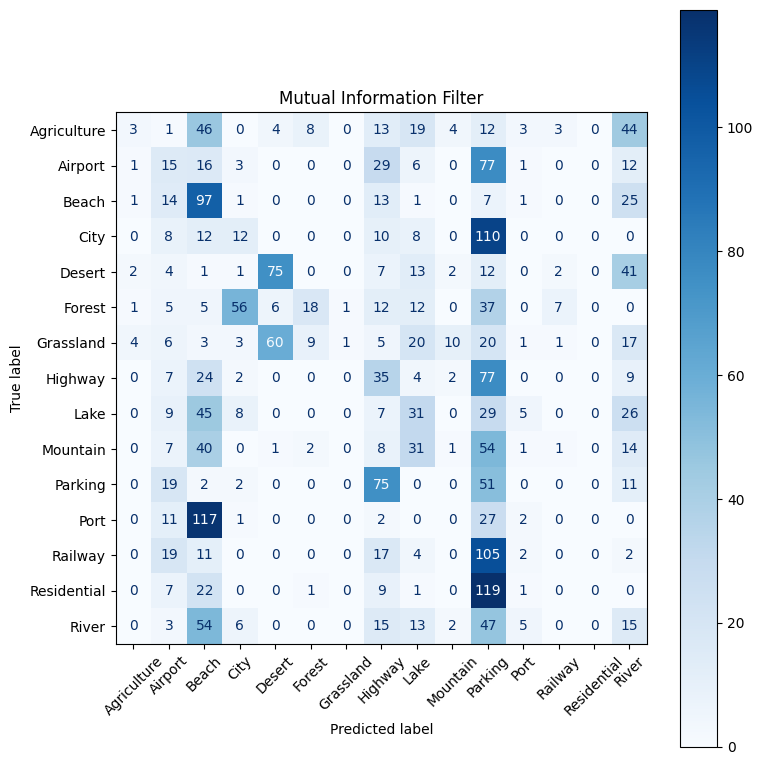

In [19]:
ShowReport(test_y, mutuf_pred, all_categories, "Mutual Information Filter")

In [20]:
ftest = SelectKBest(score_func= f_classif)
ftest_train_x = mutuf.fit_transform(train_data_x, train_y)
ftest_test_x = mutuf.transform(test_data_x)

ftest_sgd = SGDClassifier()
ftest_sgd.fit(ftest_train_x, train_y)
ftest_pred = ftest_sgd.predict(ftest_test_x)

ANOVA F-Value Accuracy: 25.50%
              precision    recall  f1-score   support

 Agriculture       0.30      0.02      0.04       160
     Airport       0.11      0.91      0.20       160
       Beach       0.80      0.27      0.40       160
        City       0.56      0.03      0.06       160
      Desert       0.36      0.92      0.52       160
      Forest       0.72      0.47      0.57       160
   Grassland       0.68      0.32      0.43       160
     Highway       0.00      0.00      0.00       160
        Lake       0.55      0.19      0.28       160
    Mountain       0.30      0.22      0.25       160
     Parking       0.31      0.47      0.38       160
        Port       0.00      0.00      0.00       160
     Railway       0.12      0.01      0.02       160
 Residential       0.00      0.00      0.00       160
       River       0.00      0.00      0.00       160

    accuracy                           0.26      2400
   macro avg       0.32      0.26      0.21      

/home/anger324/miniconda3/envs/9517_ass/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/anger324/miniconda3/envs/9517_ass/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/anger324/miniconda3/envs/9517_ass/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

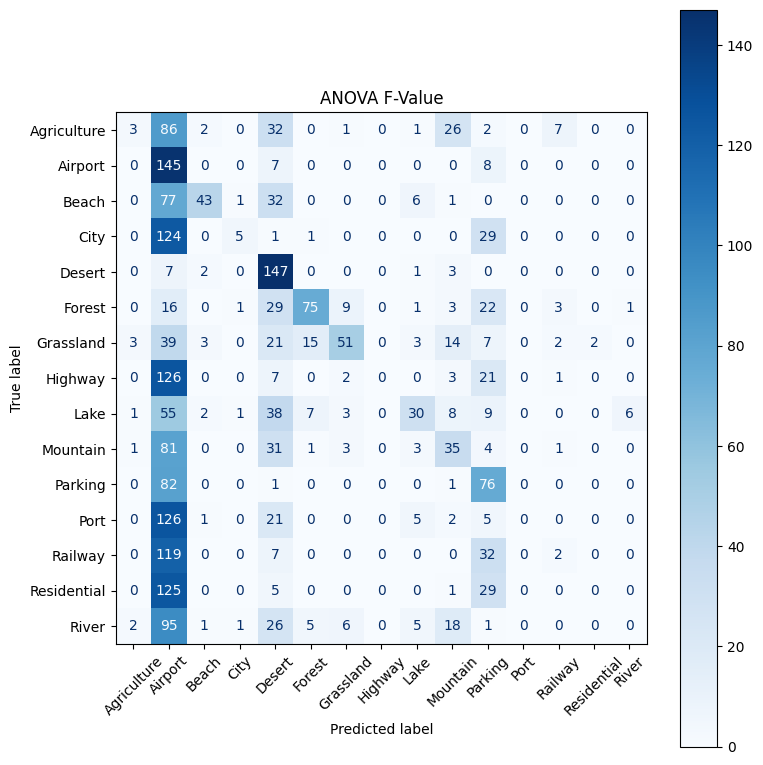

In [21]:
ShowReport(test_y, ftest_pred, all_categories, "ANOVA F-Value")